<a href="https://colab.research.google.com/github/vishant016/140_VISHANT/blob/main/LAB2/LAB2_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
missing_values = ["n/a", "na", "??","????"]
data=pd.read_csv('/content/drive/MyDrive/ML/Dataset/Exercise-CarData.csv',na_values=missing_values)
data=data.iloc[:,1:]
data

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,NaN,20544.0,Petrol,86.0,1.0,0,1300,3,1025
1432,10845,72.0,NaN,Petrol,86.0,0.0,0,1300,3,1015
1433,8500,NaN,17016.0,Petrol,86.0,0.0,0,1300,3,1015
1434,7250,70.0,NaN,NaN,86.0,1.0,0,1300,3,1015


In [3]:
#Removing rows where there are all Nans
data.dropna(how='all',inplace=True)
#Removing rows where column which is string is Nans
data.dropna(subset=['FuelType'],inplace=True)
data

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1430,8450,80.0,23000.0,Petrol,86.0,0.0,0,1300,3,1015
1431,7500,NaN,20544.0,Petrol,86.0,1.0,0,1300,3,1025
1432,10845,72.0,NaN,Petrol,86.0,0.0,0,1300,3,1015
1433,8500,NaN,17016.0,Petrol,86.0,0.0,0,1300,3,1015


In [4]:
from sklearn.impute import SimpleImputer
for s in ["Price","Age","KM","HP","MetColor","Automatic","CC","Doors","Weight"]:
    for i,c in enumerate(data[s]):
        try:
            int(c)
        except:
            data[s].iloc[i]=np.nan
imputer = SimpleImputer(missing_values = np.nan,strategy = "mean")
imputer = imputer.fit(data.iloc[:, [0,1,2,4,5,6,7,8,9]]) 
  
data.iloc[:, [0,1,2,4,5,6,7,8,9]] = imputer.transform(data.iloc[:, [0,1,2,4,5,6,7,8,9]])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [5]:
data

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500.0,23.000000,46986.000000,Diesel,90.0,1.000000,0.0,2000.0,4.035259,1165.0
1,13750.0,23.000000,72937.000000,Diesel,90.0,1.000000,0.0,2000.0,3.000000,1165.0
2,13950.0,24.000000,41711.000000,Diesel,90.0,0.671667,0.0,2000.0,3.000000,1165.0
3,14950.0,26.000000,48000.000000,Diesel,90.0,0.000000,0.0,2000.0,3.000000,1165.0
4,13750.0,30.000000,38500.000000,Diesel,90.0,0.000000,0.0,2000.0,3.000000,1170.0
...,...,...,...,...,...,...,...,...,...,...
1430,8450.0,80.000000,23000.000000,Petrol,86.0,0.000000,0.0,1300.0,3.000000,1015.0
1431,7500.0,55.753017,20544.000000,Petrol,86.0,1.000000,0.0,1300.0,3.000000,1025.0
1432,10845.0,72.000000,69123.607413,Petrol,86.0,0.000000,0.0,1300.0,3.000000,1015.0
1433,8500.0,55.753017,17016.000000,Petrol,86.0,0.000000,0.0,1300.0,3.000000,1015.0


In [6]:
data.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

#LabelEncoder

le=LabelEncoder()
data_le=data.copy()
data_le.iloc[:,[3]]=le.fit_transform(data_le.iloc[:,[3]])
data_le


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500.0,23.000000,46986.000000,1,90.0,1.000000,0.0,2000.0,4.035259,1165.0
1,13750.0,23.000000,72937.000000,1,90.0,1.000000,0.0,2000.0,3.000000,1165.0
2,13950.0,24.000000,41711.000000,1,90.0,0.671667,0.0,2000.0,3.000000,1165.0
3,14950.0,26.000000,48000.000000,1,90.0,0.000000,0.0,2000.0,3.000000,1165.0
4,13750.0,30.000000,38500.000000,1,90.0,0.000000,0.0,2000.0,3.000000,1170.0
...,...,...,...,...,...,...,...,...,...,...
1430,8450.0,80.000000,23000.000000,2,86.0,0.000000,0.0,1300.0,3.000000,1015.0
1431,7500.0,55.753017,20544.000000,2,86.0,1.000000,0.0,1300.0,3.000000,1025.0
1432,10845.0,72.000000,69123.607413,2,86.0,0.000000,0.0,1300.0,3.000000,1015.0
1433,8500.0,55.753017,17016.000000,2,86.0,0.000000,0.0,1300.0,3.000000,1015.0


In [12]:

# One HotEncoding
dummy = pd.get_dummies(data['FuelType'])
data_ohe=data.iloc[:,:]
data_ohe=data_ohe.drop(["FuelType"],axis=1)
data_ohe = pd.concat([dummy,data_ohe],axis=1)
data_ohe

,CNG,Diesel,Petrol,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
0,0,1,0,13500.0,23.000000,46986.000000,90.0,1.000000,0.0,2000.0,4.035259,1165.0
1,0,1,0,13750.0,23.000000,72937.000000,90.0,1.000000,0.0,2000.0,3.000000,1165.0
2,0,1,0,13950.0,24.000000,41711.000000,90.0,0.671667,0.0,2000.0,3.000000,1165.0
3,0,1,0,14950.0,26.000000,48000.000000,90.0,0.000000,0.0,2000.0,3.000000,1165.0
4,0,1,0,13750.0,30.000000,38500.000000,90.0,0.000000,0.0,2000.0,3.000000,1170.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1430,0,0,1,8450.0,80.000000,23000.000000,86.0,0.000000,0.0,1300.0,3.000000,1015.0
1431,0,0,1,7500.0,55.753017,20544.000000,86.0,1.000000,0.0,1300.0,3.000000,1025.0
1432,0,0,1,10845.0,72.000000,69123.607413,86.0,0.000000,0.0,1300.0,3.000000,1015.0
1433,0,0,1,8500.0,55.753017,17016.000000,86.0,0.000000,0.0,1300.0,3.000000,1015.0


In [13]:
data_correlation=data.corr()

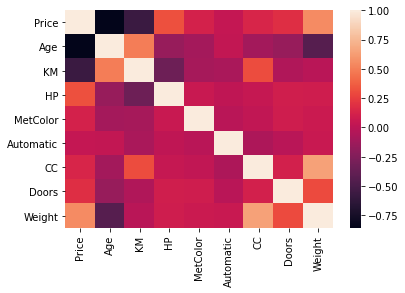

In [14]:
import seaborn as sns
sns.heatmap(data_correlation)

In [15]:
columns = np.full((data_correlation.shape[0],), True, dtype=bool)
print(columns)
for i in range(data_correlation.shape[0]):
    for j in range(i+1, data_correlation.shape[0]):
        if data_correlation.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
data_tmp=data_ohe.iloc[:,3:]
data_tmp

[ True  True  True  True  True  True  True  True  True]


,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
0,13500.0,23.000000,46986.000000,90.0,1.000000,0.0,2000.0,4.035259,1165.0
1,13750.0,23.000000,72937.000000,90.0,1.000000,0.0,2000.0,3.000000,1165.0
2,13950.0,24.000000,41711.000000,90.0,0.671667,0.0,2000.0,3.000000,1165.0
3,14950.0,26.000000,48000.000000,90.0,0.000000,0.0,2000.0,3.000000,1165.0
4,13750.0,30.000000,38500.000000,90.0,0.000000,0.0,2000.0,3.000000,1170.0
...,...,...,...,...,...,...,...,...,...
1430,8450.0,80.000000,23000.000000,86.0,0.000000,0.0,1300.0,3.000000,1015.0
1431,7500.0,55.753017,20544.000000,86.0,1.000000,0.0,1300.0,3.000000,1025.0
1432,10845.0,72.000000,69123.607413,86.0,0.000000,0.0,1300.0,3.000000,1015.0
1433,8500.0,55.753017,17016.000000,86.0,0.000000,0.0,1300.0,3.000000,1015.0


In [16]:
selected_columns = data_tmp.columns[columns]
print(data_tmp.shape,selected_columns.shape)
data_tmp=data_tmp[selected_columns]
data_tmp

(1336, 9) (9,)


,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
0,13500.0,23.000000,46986.000000,90.0,1.000000,0.0,2000.0,4.035259,1165.0
1,13750.0,23.000000,72937.000000,90.0,1.000000,0.0,2000.0,3.000000,1165.0
2,13950.0,24.000000,41711.000000,90.0,0.671667,0.0,2000.0,3.000000,1165.0
3,14950.0,26.000000,48000.000000,90.0,0.000000,0.0,2000.0,3.000000,1165.0
4,13750.0,30.000000,38500.000000,90.0,0.000000,0.0,2000.0,3.000000,1170.0
...,...,...,...,...,...,...,...,...,...
1430,8450.0,80.000000,23000.000000,86.0,0.000000,0.0,1300.0,3.000000,1015.0
1431,7500.0,55.753017,20544.000000,86.0,1.000000,0.0,1300.0,3.000000,1025.0
1432,10845.0,72.000000,69123.607413,86.0,0.000000,0.0,1300.0,3.000000,1015.0
1433,8500.0,55.753017,17016.000000,86.0,0.000000,0.0,1300.0,3.000000,1015.0


In [17]:
data_final=data_ohe.iloc[:,0:3]
# print(data_ohe)
data_final=pd.concat([data_final,data_tmp],axis=1)
data_final

,CNG,Diesel,Petrol,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
0,0,1,0,13500.0,23.000000,46986.000000,90.0,1.000000,0.0,2000.0,4.035259,1165.0
1,0,1,0,13750.0,23.000000,72937.000000,90.0,1.000000,0.0,2000.0,3.000000,1165.0
2,0,1,0,13950.0,24.000000,41711.000000,90.0,0.671667,0.0,2000.0,3.000000,1165.0
3,0,1,0,14950.0,26.000000,48000.000000,90.0,0.000000,0.0,2000.0,3.000000,1165.0
4,0,1,0,13750.0,30.000000,38500.000000,90.0,0.000000,0.0,2000.0,3.000000,1170.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1430,0,0,1,8450.0,80.000000,23000.000000,86.0,0.000000,0.0,1300.0,3.000000,1015.0
1431,0,0,1,7500.0,55.753017,20544.000000,86.0,1.000000,0.0,1300.0,3.000000,1025.0
1432,0,0,1,10845.0,72.000000,69123.607413,86.0,0.000000,0.0,1300.0,3.000000,1015.0
1433,0,0,1,8500.0,55.753017,17016.000000,86.0,0.000000,0.0,1300.0,3.000000,1015.0


In [18]:


data_final.isnull().sum().sum()



0